In [4]:
# Victor Z and Leo Gonzalez
# UW-Madison, 2024
# illustrate simple linear estimation with wrong model

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [5]:
# generate data for input
np.random.seed(0)
S = 100
xobs = np.random.rand(S)

# generate true output
theta = 2
y = theta*xobs**2

# add noise
sigma = 0.25
eps = np.random.normal(0, sigma, S)
yobs = y+eps

# now get estimate htheta that extracts max knowledge from data
htheta = (xobs.T@yobs)/(xobs.T@xobs)

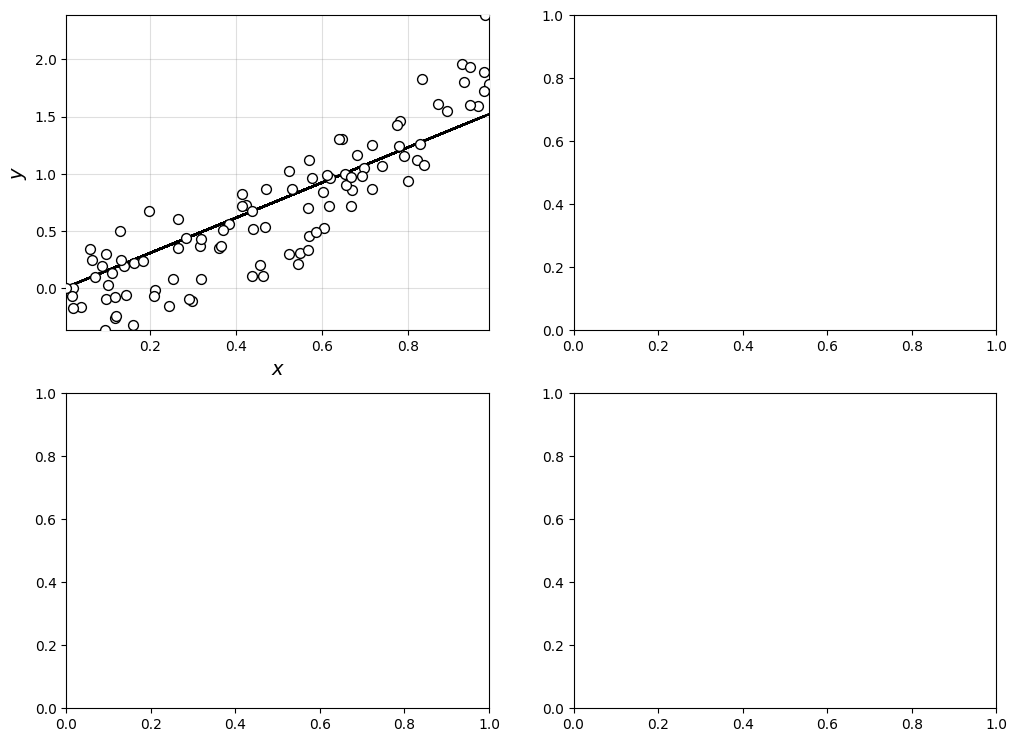

In [6]:
# plot model prediction
ypred = htheta*xobs

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = [12, 9])
ax1.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax1.set_axisbelow(True)
ax1.set_xlabel(r'$x$', fontsize = 14)
ax1.set_xlim(np.min(xobs), np.max(xobs))
ax1.set_ylabel(r'$y$', fontsize = 14)
ax1.set_ylim(min(np.min(ypred), np.min(yobs)), max(np.max(ypred), np.max(yobs)))
ax1.plot(xobs, ypred, 'k-', linewidth = 1.5)
ax1.scatter(xobs, yobs, marker = 'o', color = 'w', edgecolor = 'k', s = 50, zorder = 3)

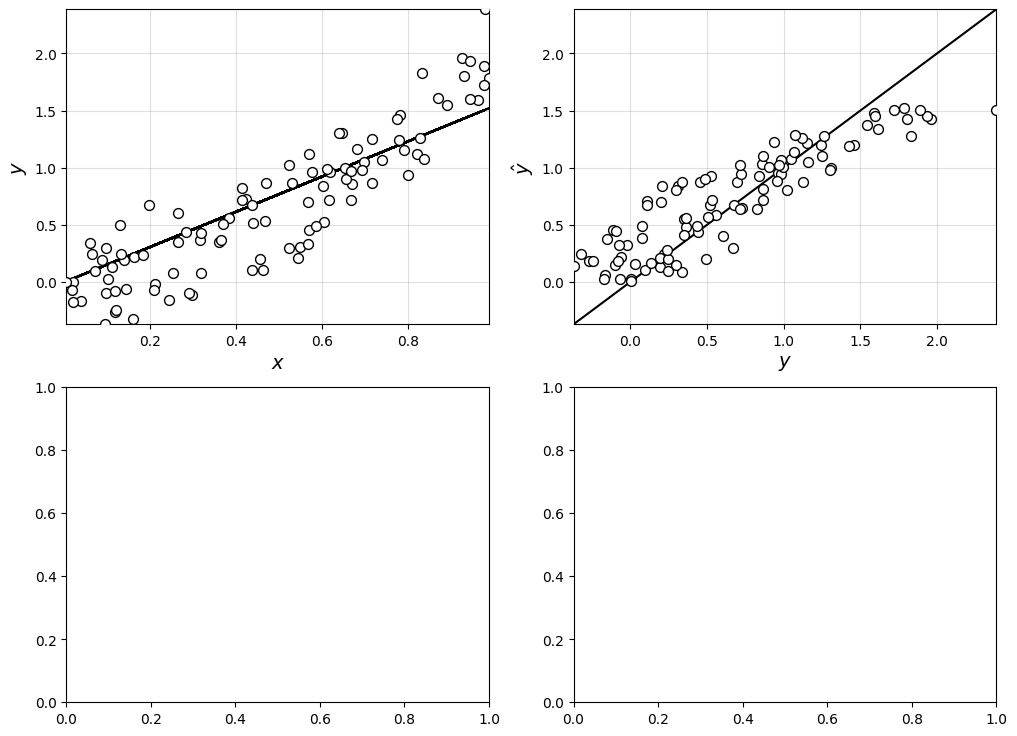

In [7]:
# parity plot
yy = np.linspace(min(yobs), max(yobs))

ax2.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax2.set_axisbelow(True)
ax2.set_xlabel(r'$y$', fontsize = 14)
ax2.set_xlim(np.min(yobs), np.max(yobs))
ax2.set_ylabel(r'$\hat{y}$', fontsize = 14)
ax2.set_ylim(np.min(yobs), np.max(yobs))
ax2.plot(yy, yy, 'k-', linewidth = 1.5)
ax2.scatter(yobs, ypred, marker = 'o', color = 'w', edgecolor = 'k', s = 50, zorder = 3)
fig

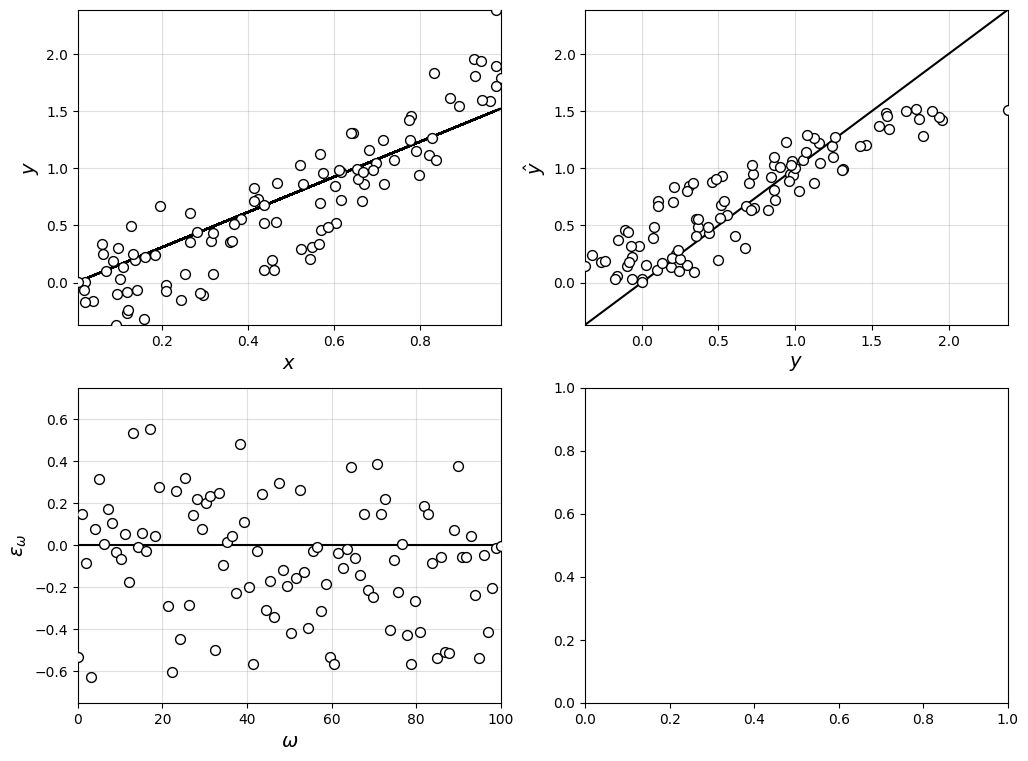

In [8]:
# plot residuals
epsm = yobs-ypred
xx = np.linspace(0, S, len(epsm))
yy = np.linspace(0, 0, len(epsm))

ax3.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax3.set_axisbelow(True)
ax3.set_xlabel(r'$\omega$', fontsize = 14)
ax3.set_xlim(0, S)
ax3.set_ylabel(r'$\epsilon_\omega$', fontsize = 14)
ax3.set_ylim(-3*sigma, 3*sigma)
ax3.plot(xx, yy, 'k-', linewidth = 1.5)
ax3.scatter(xx, epsm, marker = 'o', color = 'w', edgecolor = 'k', s = 50, zorder = 3)
fig

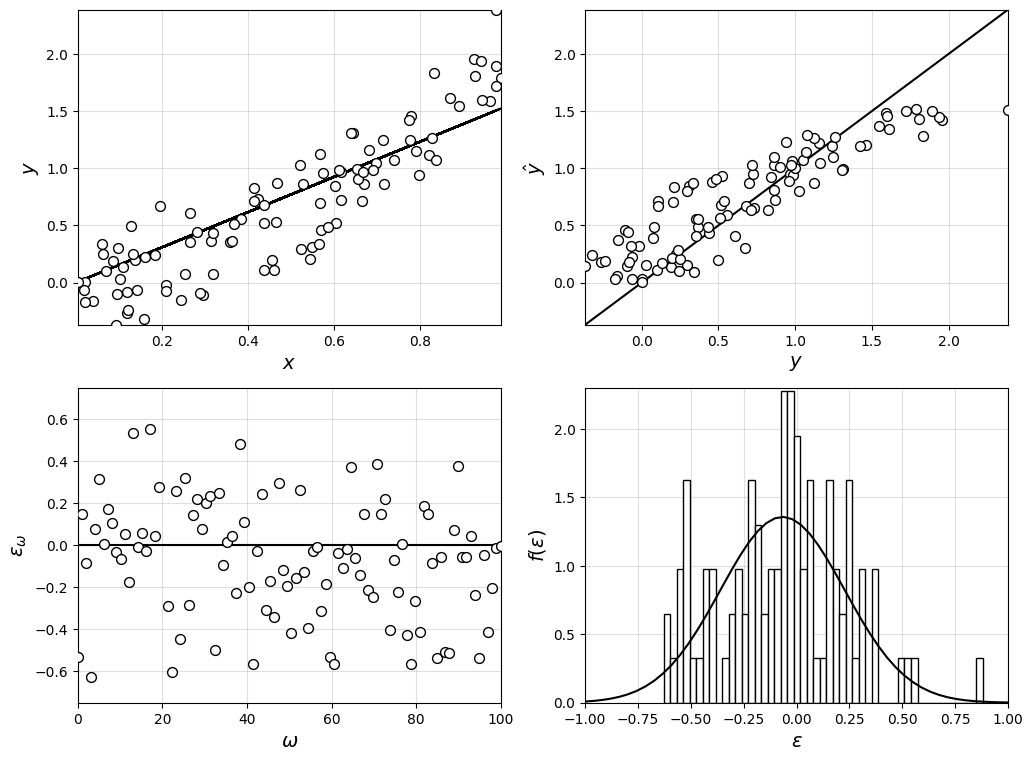

In [9]:
# fit residual distribution
pd = norm.fit(epsm)
xx = np.linspace(-1, 1)

ax4.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax4.set_axisbelow(True)
ax4.set_xlabel(r'$\epsilon$', fontsize = 14)
ax4.set_xlim(-1, 1)
ax4.set_ylabel(r'$f(\epsilon)$', fontsize = 14)
ax4.set_ylim(0, 2.3)
ax4.hist(epsm, np.linspace(np.min(epsm), np.max(epsm)), color = 'w', edgecolor = 'k', linewidth = 1, density = True)
ax4.plot(xx, norm.pdf(xx, loc = pd[0], scale = pd[1]), 'k-', linewidth = 1.5)
fig